## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

equation: coeff_age* age + coeff_chol*chol + intercept = 0

In [2]:
#packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import sympy as sp
from plotnine import *

In [3]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [4]:
X = data[["age", "chol"]]
y = data["diagnosis"]


In [5]:
# #dummify all variables (all objects)
# ct = ColumnTransformer([
#   ("dummify",
#   OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
#   make_column_selector(dtype_include=object))], remainder = "passthrough"
# )

In [6]:
log_pipeline = Pipeline(
  [
  ("log_reg", LogisticRegression())]
).set_output(transform = "pandas")

In [7]:
fitted_pipeline = log_pipeline.fit(X, y)
fitted_pipeline

Pipeline(steps=[('log_reg', LogisticRegression())])

In [25]:
log_intercept = fitted_pipeline.named_steps["log_reg"].intercept_
log_intercept

array([-3.24011226])

In [26]:
coeff_age_log = fitted_pipeline.named_steps["log_reg"].coef_[0][0]
print(coeff_age_log)

coeff_chol_log = fitted_pipeline.named_steps["log_reg"].coef_[0][1]
print(coeff_chol_log)

0.04686330613034962
0.0018012385190296785


In [10]:
#55 year old
# 0.04686331 * 55 + 0.00180124*chol + -3.24011226 = 2.19722

chol = (3.24011226 - (0.04686331 * 55))/0.00180124
chol


367.87446980968673

In [11]:
#90%
z = np.log(0.9/(1-0.9))
z

# 0.04686331 * 55 + 0.00180124*chol + -3.24011226 =

chol = (z + 3.24011226 - (0.04686331 * 55))/0.00180124
chol

1587.7144563390887

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [12]:
lda_pipeline = Pipeline(
  [("LDA", LinearDiscriminantAnalysis())])

fitted_pipeline_lda = lda_pipeline.fit(X, y)
fitted_pipeline_lda

Pipeline(steps=[('LDA', LinearDiscriminantAnalysis())])

In [13]:
fitted_pipeline_lda.named_steps["LDA"].intercept_

array([-3.21967766])

In [14]:
coeff_lda = fitted_pipeline_lda.named_steps["LDA"].coef_
coeff_lda

array([[0.04655744, 0.00178967]])

In [15]:
chol = (3.21967766 - (0.04655744 * 55))/0.00178967
chol

368.2346242603385

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [16]:
svc_pipeline = Pipeline(
  [("svc", SVC(kernel = "linear"))])

fitted_pipeline_svc = svc_pipeline.fit(X, y)
fitted_pipeline_svc

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [17]:
fitted_pipeline_svc.named_steps["svc"].intercept_

array([-4.68603406])

In [18]:
coeff_svc = fitted_pipeline_svc.named_steps["svc"].coef_
coeff_svc

array([[0.06439772, 0.00365896]])

In [19]:
chol = (4.68603406 - (0.06439772 * 55))/0.00365896
chol

312.70072916894406

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [20]:
#x and y is age and cholesterol
#diff colors based on disease or no disease
#then lines splitting the two categories

so the original equation you have right now is:
equation: coeff_age* age + coeff_chol*chol + intercept = 0

but we need to have the boundaries as lines y=mx+b

do algrebra to rewrite the equation, if x = age and y = cholesterol



In [35]:
#getting slopes and intercepts for each model

#log regression
# log_intercept = fitted_pipeline.named_steps["log_reg"].intercept_[0]
# print(log_intercept)

# coeff_age_log = fitted_pipeline.named_steps["log_reg"].coef_[0][0]
# print(coeff_age_log)

# coeff_chol_log = fitted_pipeline.named_steps["log_reg"].coef_[0][1]
# print(coeff_chol_log)

slope_log = -fitted_pipeline.named_steps["log_reg"].coef_[0][0] / fitted_pipeline.named_steps["log_reg"].coef_[0][1]
intercept_log = -fitted_pipeline.named_steps["log_reg"].intercept_[0] / fitted_pipeline.named_steps["log_reg"].coef_[0][1]

slope_lda = -fitted_pipeline_lda.named_steps["LDA"].coef_[0][0] / fitted_pipeline_lda.named_steps["LDA"].coef_[0][1]
intercept_lda = -fitted_pipeline_lda.named_steps["LDA"].intercept_[0] / fitted_pipeline_lda.named_steps["LDA"].coef_[0][1]

slope_svc = -fitted_pipeline_svc.named_steps["svc"].coef_[0][0] / fitted_pipeline_svc.named_steps["svc"].coef_[0][1]
intercept_svc = -fitted_pipeline_svc.named_steps["svc"].intercept_[0] / fitted_pipeline_svc.named_steps["svc"].coef_[0][1]



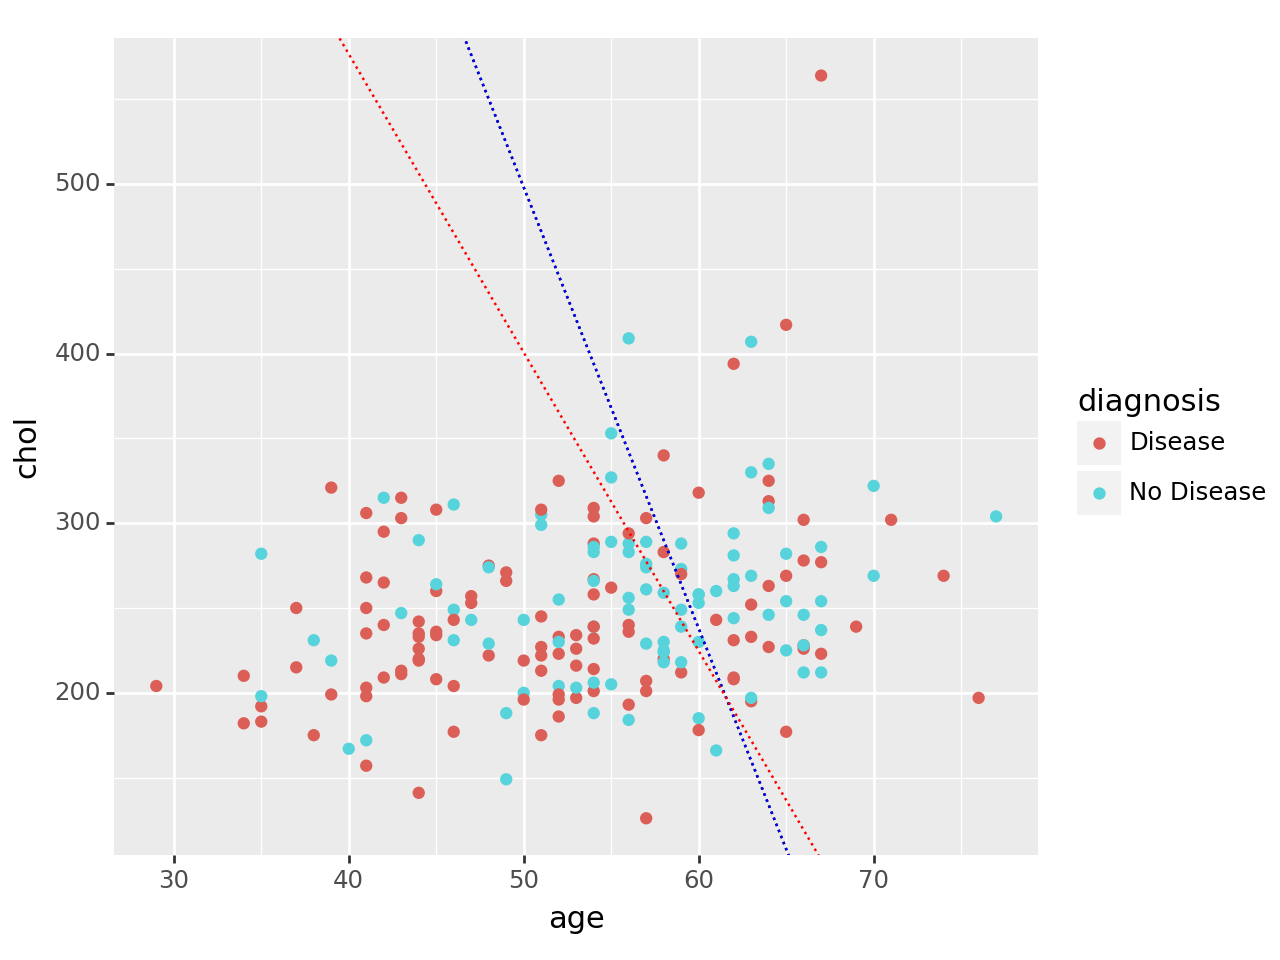

<Figure Size: (640 x 480)>

In [37]:
(ggplot(data, aes(x = "age", y = "chol", color = "diagnosis"))
+ geom_point()
+ geom_abline(intercept = intercept_log, slope = slope_log, linetype = "dotted", color = "black")
+ geom_abline(intercept = intercept_lda, slope = slope_lda, linetype = "dotted", color = "blue")
+ geom_abline(intercept = intercept_svc, slope = slope_svc, linetype = "dotted", color = "red"))